In [ ]:
pip install missingno

In [110]:
import math
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SequentialFeatureSelector 
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,explained_variance_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from numpy import arange

from matplotlib import pyplot

%matplotlib inline
warnings.filterwarnings('ignore')

In [111]:
#from pandas_profiling import ProfileReport


In [112]:
df=pd.read_csv("acs2017_data.csv")
df.shape


(74001, 37)

In [113]:
# Printing the descriptive Statistics for the Numerical fields in dataframe
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TractId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,74001.00,74001.00,74001.00,74001.00,73305.00,73305.00,73305.00,73305.00,73305.00,73305.00,...,73200.00,73200.00,73200.00,73055.00,74001.00,73190.00,73190.00,73190.00,73190.00,73191.00
mean,28391128262.00,4384.72,2157.71,2227.01,17.27,61.31,13.29,0.73,4.75,0.15,...,3.04,1.89,4.66,26.06,2049.15,79.49,14.16,6.17,0.17,7.25
std,16475927905.34,2228.94,1120.56,1146.24,23.07,30.63,21.60,4.55,9.00,1.03,...,5.81,2.55,4.01,7.12,1138.87,8.13,7.33,3.93,0.46,5.23
min,1001020100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,13039010401.00,2903.00,1416.00,1465.00,2.60,38.00,0.80,0.00,0.20,0.00,...,0.40,0.40,2.00,21.10,1276.00,75.20,9.30,3.50,0.00,3.90
50%,28047001300.00,4105.00,2007.00,2082.00,7.40,70.40,3.80,0.00,1.50,0.00,...,1.40,1.20,3.80,25.40,1895.00,80.60,13.00,5.50,0.00,6.00
75%,42003414101.00,5506.00,2707.00,2803.00,21.10,87.70,14.60,0.40,5.00,0.00,...,3.30,2.50,6.30,30.30,2635.00,85.00,17.60,8.00,0.00,9.00
90%,48469001300.00,6998.00,3477.00,3576.00,52.10,94.70,42.00,1.20,12.60,0.20,...,6.90,4.50,9.40,35.30,3422.00,88.50,23.00,11.00,0.60,13.40
95%,53035091203.00,8045.00,4015.00,4107.00,74.30,96.60,69.10,2.20,21.20,0.60,...,11.10,6.31,11.70,38.80,3979.00,90.40,27.10,13.30,1.00,17.00
99%,72027320401.00,11230.00,5651.00,5769.00,98.80,98.70,94.40,10.80,47.70,3.10,...,31.40,11.70,17.60,46.45,5463.00,93.80,38.00,19.00,2.00,26.80


In [114]:
df.isnull().sum()

TractId                0
State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64

In [115]:
#plt.bar(df['TotalPop'],df['State'])
#plt.show()

Given the nature of data analyzing the data in groups of features.

Starting with State, County and Tract features

Now Encoding the State and County as they are the only Categorical features in the dataset.


In [116]:
# Encoding the Nominal value columns ('State' and 'County') to convert them to numerical values using OrdinalEncoder

ord_enc = OrdinalEncoder()
df["State_Code"] = ord_enc.fit_transform(df[["State"]])

df["County_Code"] = ord_enc.fit_transform(df[["County"]])

df.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,State_Code,County_Code
0,1001020100,Alabama,Autauga County,1845,899,946,2.40,86.30,5.20,0.00,...,2.10,24.50,881,74.20,21.20,4.50,0.00,4.60,0.00,89.00
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.10,41.60,54.50,0.00,...,0.00,22.20,852,75.90,15.00,9.00,0.00,3.40,0.00,89.00
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.00,61.40,26.50,0.60,...,1.50,23.10,1482,73.30,21.10,4.80,0.70,4.70,0.00,89.00
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.60,80.30,7.10,0.50,...,2.10,25.90,1849,75.80,19.70,4.50,0.00,6.10,0.00,89.00
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.90,77.50,16.40,0.00,...,0.70,21.00,4787,71.40,24.10,4.50,0.00,2.30,0.00,89.00


In [117]:


#Top and bottom five tracts based on Income  
print ("Here are the top and bottom five tracts based on Income: ")
df[["State","County","TractId","Income"]].sort_values(by = "Income", ascending = False)



Here are the top and bottom five tracts based on Income: 


,State,County,TractId,Income
10787,California,Santa Clara County,6085511701,249750.00
62889,Texas,Dallas County,48113013300,249219.00
47955,New York,Westchester County,36119005400,248438.00
63180,Texas,Dallas County,48113019700,246389.00
63177,Texas,Dallas County,48113019501,246172.00
...,...,...,...,...
73926,Puerto Rico,Toa Baja Municipio,72137990000,NaN
73957,Puerto Rico,Vega Alta Municipio,72143990000,NaN
73971,Puerto Rico,Vega Baja Municipio,72145990000,NaN
73974,Puerto Rico,Vieques Municipio,72147990000,NaN


In [118]:
# Count of Tracts, by State and County, where the Income value is missing
print("Total number of Tracts where the Income value is missing: ", df[df["Income"].isnull()].TractId.count())
print("\n\nThe list of top 10 State and County, by number of Tracts, where the Income value is missing: ")
df[df["Income"].isnull()].groupby(["State","County"]).TractId.count().sort_values(ascending = False).head(10)

Total number of Tracts where the Income value is missing:  1116


The list of top 10 State and County, by number of Tracts, where the Income value is missing: 


State          County            
California     Los Angeles County    41
New York       Queens County         27
Hawaii         Hawaii County         17
Puerto Rico    San Juan Municipio    15
Florida        Miami-Dade County     14
Hawaii         Honolulu County       14
New York       Kings County          13
               New York County       13
Pennsylvania   Allegheny County      12
Massachusetts  Suffolk County        12
Name: TractId, dtype: int64

In [119]:
#Missing values are there in target column which need to be resorted. 

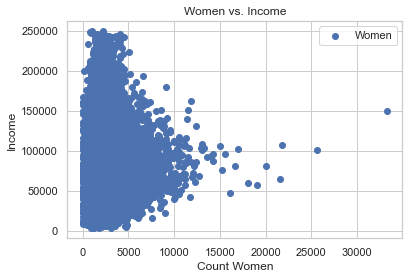

In [120]:
# Women vs income 
plt.scatter(df['Women'], df['Income'], label="Women")
plt.title("Women vs. Income")
plt.xlabel("Count Women")
plt.ylabel("Income")
plt.legend(loc='upper right')
plt.show()

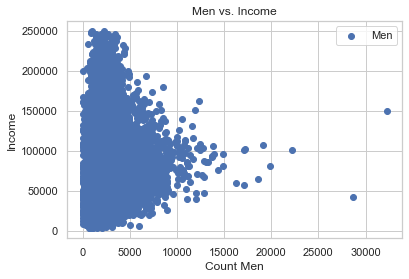

In [121]:
plt.scatter(df['Men'], df['Income'], label="Men")
plt.title("Men vs. Income")
plt.xlabel("Count Men")
plt.ylabel("Income")
plt.legend(loc='upper right')
plt.show()

In [122]:
df.loc[df['TotalPop'] == 0]

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,State_Code,County_Code
43,1003990000,Alabama,Baldwin County,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.00,97.00
107,1015981902,Alabama,Calhoun County,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.00,261.00
108,1015981903,Alabama,Calhoun County,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.00,261.00
868,1097990000,Alabama,Mobile County,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.00,1175.00
1063,1117980000,Alabama,Shelby County,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.00,1602.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73926,72137990000,Puerto Rico,Toa Baja Municipio,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,39.00,1744.00
73957,72143990000,Puerto Rico,Vega Alta Municipio,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,39.00,1806.00
73971,72145990000,Puerto Rico,Vega Baja Municipio,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,39.00,1807.00
73974,72147990000,Puerto Rico,Vieques Municipio,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,39.00,1816.00


In [123]:
#Exploring the tracts with 0 population data
df.loc[(df['TotalPop'] == 0) & (df['Men'] == 0) & (df['Women'] == 0) & (df['VotingAgeCitizen'] == 0) ]

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,State_Code,County_Code
43,1003990000,Alabama,Baldwin County,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.00,97.00
107,1015981902,Alabama,Calhoun County,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.00,261.00
108,1015981903,Alabama,Calhoun County,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.00,261.00
868,1097990000,Alabama,Mobile County,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.00,1175.00
1063,1117980000,Alabama,Shelby County,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.00,1602.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73926,72137990000,Puerto Rico,Toa Baja Municipio,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,39.00,1744.00
73957,72143990000,Puerto Rico,Vega Alta Municipio,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,39.00,1806.00
73971,72145990000,Puerto Rico,Vega Baja Municipio,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,39.00,1807.00
73974,72147990000,Puerto Rico,Vieques Municipio,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,39.00,1816.00


In [124]:
pop_list=list(df.loc[(df['TotalPop'] == 0) & (df['Men'] == 0) & (df['Women'] == 0) & (df['VotingAgeCitizen'] == 0) ].index)

In [125]:
#Looks like there are 696 Tracts where the Total population is captured as zero. 
#Also from the above sample it looks like the other fields are also either 0 value or NaN.
#That doesnt sound realistic.


In [126]:
#df=df.drop(pop_list)
df

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,State_Code,County_Code
0,1001020100,Alabama,Autauga County,1845,899,946,2.40,86.30,5.20,0.00,...,2.10,24.50,881,74.20,21.20,4.50,0.00,4.60,0.00,89.00
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.10,41.60,54.50,0.00,...,0.00,22.20,852,75.90,15.00,9.00,0.00,3.40,0.00,89.00
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.00,61.40,26.50,0.60,...,1.50,23.10,1482,73.30,21.10,4.80,0.70,4.70,0.00,89.00
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.60,80.30,7.10,0.50,...,2.10,25.90,1849,75.80,19.70,4.50,0.00,6.10,0.00,89.00
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.90,77.50,16.40,0.00,...,0.70,21.00,4787,71.40,24.10,4.50,0.00,2.30,0.00,89.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.70,0.30,0.00,0.00,...,3.60,26.90,1576,59.20,33.80,7.00,0.00,20.80,39.00,1939.00
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.10,0.90,0.00,0.00,...,1.30,25.30,666,58.40,35.40,6.20,0.00,26.30,39.00,1939.00
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.50,0.20,0.00,0.00,...,3.40,23.50,560,57.50,34.50,8.00,0.00,23.00,39.00,1939.00
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.00,0.00,0.00,0.00,...,0.00,24.10,1062,67.70,30.40,1.90,0.00,29.50,39.00,1939.00


In [127]:
#Check for Duplicate records

#Finding the Duplicates rows in dataframe
df.duplicated().sum()



0

In [128]:
# Check if there are any duplicate rows across the independent varibales set
print("Total number of duplicate rows with TractId are:", len(df[df.duplicated(['TractId'])]))

Total number of duplicate rows with TractId are: 0


In [129]:
#Hence we notice no duplicate record

## Missing value Analysis and imputation

In [130]:
# Filter out data where TotalPopulation is > 0 in the dataset
df = df.loc[df['TotalPop'] > 0]
df.shape


(73305, 39)

In [131]:
# Total Null values in Raw dataset
df.isnull().sum()

TractId               0
State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Hispanic              0
White                 0
Black                 0
Native                0
Asian                 0
Pacific               0
VotingAgeCitizen      0
Income              420
IncomeErr           420
IncomePerCap         49
IncomePerCapErr      49
Poverty             146
ChildPoverty        414
Professional        115
Service             115
Office              115
Construction        115
Production          115
Drive               105
Carpool             105
Transit             105
Walk                105
OtherTransp         105
WorkAtHome          105
MeanCommute         250
Employed              0
PrivateWork         115
PublicWork          115
SelfEmployed        115
FamilyWork          115
Unemployment        114
State_Code            0
County_Code           0
dtype: int64

In [132]:
# Finding missing values count on column level along with the percentage of missing.

Missing_total   = df.isnull().sum().sort_values(ascending=False) 
Missing_percent = df.isnull().sum() / len(df) * 100
missing_data_info = pd.concat([Missing_total, Missing_percent], axis = 1, keys=['Missing_Total','Missing_Percent'])
missing_data_info.sort_values(by = 'Missing_Percent',ascending=False)

,Missing_Total,Missing_Percent
Income,420,0.57
IncomeErr,420,0.57
ChildPoverty,414,0.56
MeanCommute,250,0.34
Poverty,146,0.20
Professional,115,0.16
Production,115,0.16
FamilyWork,115,0.16
PublicWork,115,0.16
PrivateWork,115,0.16


In [133]:
len(df)

73305

In [134]:
# Finding missing values count on column level along with the percentage of missing.

Missing_total   = df.isnull().sum().sort_values(ascending=False) 
Missing_percent =df.isnull().sum() / len(df) * 100
missing_data_info = pd.concat([Missing_total, Missing_percent], axis = 1, keys=['Missing_Total','Missing_Percent'])
missing_data_info.sort_values(by = 'Missing_Percent',ascending=False)

,Missing_Total,Missing_Percent
Income,420,0.57
IncomeErr,420,0.57
ChildPoverty,414,0.56
MeanCommute,250,0.34
Poverty,146,0.20
Professional,115,0.16
Production,115,0.16
FamilyWork,115,0.16
PublicWork,115,0.16
PrivateWork,115,0.16


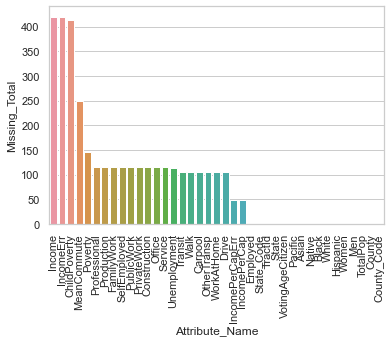

In [135]:
# As a bar plot
missing_data_info['Attribute_Name'] = missing_data_info.index

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Attribute_Name', y = 'Missing_Total', data = missing_data_info)
plt.xticks(rotation = 90)
plt.show()

In [136]:
#There are total of 3527 missing values in our total dataset. 
#With the Income having the highest number of missing values

## Imputation Methods

#### Using KNN Imputation method¶


In [137]:
#Before Imputing missing values let's remove 
#redundant columns and then normalize the data.
df.columns

Index(['TractId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'State_Code',
       'County_Code'],
      dtype='object')

In [138]:
#Drop the redundant columns and the TractId columns, as it add no value anymore. 
#Also dropping the IncomeErr, IncomePerCap and IncomePerCapErr columns too as they are not target variables
df1=df.drop('TractId',axis=1)
df1

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,State_Code,County_Code
0,Alabama,Autauga County,1845,899,946,2.40,86.30,5.20,0.00,1.20,...,2.10,24.50,881,74.20,21.20,4.50,0.00,4.60,0.00,89.00
1,Alabama,Autauga County,2172,1167,1005,1.10,41.60,54.50,0.00,1.00,...,0.00,22.20,852,75.90,15.00,9.00,0.00,3.40,0.00,89.00
2,Alabama,Autauga County,3385,1533,1852,8.00,61.40,26.50,0.60,0.70,...,1.50,23.10,1482,73.30,21.10,4.80,0.70,4.70,0.00,89.00
3,Alabama,Autauga County,4267,2001,2266,9.60,80.30,7.10,0.50,0.20,...,2.10,25.90,1849,75.80,19.70,4.50,0.00,6.10,0.00,89.00
4,Alabama,Autauga County,9965,5054,4911,0.90,77.50,16.40,0.00,3.10,...,0.70,21.00,4787,71.40,24.10,4.50,0.00,2.30,0.00,89.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,Puerto Rico,Yauco Municipio,6011,3035,2976,99.70,0.30,0.00,0.00,0.00,...,3.60,26.90,1576,59.20,33.80,7.00,0.00,20.80,39.00,1939.00
73997,Puerto Rico,Yauco Municipio,2342,959,1383,99.10,0.90,0.00,0.00,0.00,...,1.30,25.30,666,58.40,35.40,6.20,0.00,26.30,39.00,1939.00
73998,Puerto Rico,Yauco Municipio,2218,1001,1217,99.50,0.20,0.00,0.00,0.20,...,3.40,23.50,560,57.50,34.50,8.00,0.00,23.00,39.00,1939.00
73999,Puerto Rico,Yauco Municipio,4380,1964,2416,100.00,0.00,0.00,0.00,0.00,...,0.00,24.10,1062,67.70,30.40,1.90,0.00,29.50,39.00,1939.00


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73305 entries, 0 to 74000
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           73305 non-null  int64  
 1   State             73305 non-null  object 
 2   County            73305 non-null  object 
 3   TotalPop          73305 non-null  int64  
 4   Men               73305 non-null  int64  
 5   Women             73305 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  73305 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

In [140]:
df[['Income','IncomeErr','IncomePerCap','IncomePerCapErr']].describe()

,Income,IncomeErr,IncomePerCap,IncomePerCapErr
count,72885.00,72885.00,73256.00,73256.00
mean,61086.83,9697.47,30651.80,4270.17
std,30516.10,6154.67,16126.94,3148.05
min,2692.00,728.00,32.00,20.00
25%,40357.00,5735.00,20556.75,2503.00
50%,54375.00,8267.00,27215.50,3404.00
75%,74659.00,11913.00,36408.25,4968.25
max,249750.00,153365.00,220253.00,134017.00


In [141]:
df.corr()

,TractId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,State_Code,County_Code
TractId,1.00,-0.03,-0.03,-0.02,-0.02,0.08,-0.02,-0.00,-0.15,-0.05,...,-0.10,-0.05,-0.02,-0.03,0.07,-0.06,-0.01,-0.01,0.98,-0.04
TotalPop,-0.03,1.00,0.98,0.98,0.11,-0.03,-0.11,-0.04,0.11,0.02,...,-0.01,0.11,0.93,0.04,-0.00,-0.08,-0.03,-0.13,-0.02,0.01
Men,-0.03,0.98,1.00,0.93,0.11,-0.02,-0.13,-0.03,0.11,0.03,...,-0.00,0.10,0.90,0.03,0.00,-0.07,-0.02,-0.14,-0.02,0.01
Women,-0.02,0.98,0.93,1.00,0.09,-0.04,-0.08,-0.04,0.11,0.02,...,-0.02,0.12,0.92,0.05,-0.01,-0.09,-0.03,-0.12,-0.02,0.00
Hispanic,-0.02,0.11,0.11,0.09,1.00,-0.66,-0.12,-0.04,0.03,0.02,...,-0.16,0.12,0.03,0.05,-0.09,0.07,-0.03,0.22,-0.09,0.01
White,0.08,-0.03,-0.02,-0.04,-0.66,1.00,-0.58,-0.07,-0.25,-0.10,...,0.24,-0.21,0.05,-0.04,-0.02,0.12,0.06,-0.46,0.12,0.01
Black,-0.02,-0.11,-0.13,-0.08,-0.12,-0.58,1.00,-0.05,-0.11,-0.04,...,-0.20,0.10,-0.16,0.03,0.09,-0.23,-0.05,0.45,-0.01,-0.04
Native,-0.00,-0.04,-0.03,-0.04,-0.04,-0.07,-0.05,1.00,-0.04,0.01,...,0.03,-0.07,-0.07,-0.22,0.24,0.01,0.01,0.10,0.00,0.01
Asian,-0.15,0.11,0.11,0.11,0.03,-0.25,-0.11,-0.04,1.00,0.16,...,0.05,0.20,0.16,0.07,-0.06,-0.03,-0.02,-0.10,-0.14,0.03
Pacific,-0.05,0.02,0.03,0.02,0.02,-0.10,-0.04,0.01,0.16,1.00,...,-0.00,0.01,0.02,-0.03,0.04,-0.00,-0.00,0.00,-0.05,0.00


In [142]:
df[['Income','IncomeErr','IncomePerCap','IncomePerCapErr']].corr()

,Income,IncomeErr,IncomePerCap,IncomePerCapErr
Income,1.00,0.61,0.84,0.49
IncomeErr,0.61,1.00,0.60,0.51
IncomePerCap,0.84,0.60,1.00,0.75
IncomePerCapErr,0.49,0.51,0.75,1.00


In [143]:
df[['Income','IncomeErr']]

,Income,IncomeErr
0,67826.00,14560.00
1,41287.00,3819.00
2,46806.00,9496.00
3,55895.00,4369.00
4,68143.00,14424.00
...,...,...
73996,20522.00,2879.00
73997,24605.00,6027.00
73998,18225.00,4913.00
73999,18688.00,4501.00


In [144]:
df2 = df1.drop(['State','County','TotalPop','IncomeErr','IncomePerCap','IncomePerCapErr'], axis=1)

In [145]:
df2.columns

Index(['Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'VotingAgeCitizen', 'Income', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment', 'State_Code', 'County_Code'],
      dtype='object')

In [146]:
#import sklearn StandardScaler library for z-score normalization  
scaler = StandardScaler()

#create a new dataframe with normalized values
normdf = pd.DataFrame(scaler.fit_transform(df2),columns = df2.columns) 

normdf.head()

,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,State_Code,County_Code
0,-1.16,-1.15,-0.64,0.82,-0.37,-0.16,-0.39,-0.14,-1.14,0.22,...,-0.64,-0.22,-1.05,-0.65,0.96,-0.43,-0.37,-0.51,-1.61,-1.72
1,-0.91,-1.10,-0.70,-0.64,1.91,-0.16,-0.42,-0.14,-0.97,-0.65,...,-1.16,-0.54,-1.08,-0.44,0.11,0.72,-0.37,-0.74,-1.61,-1.72
2,-0.58,-0.35,-0.40,0.00,0.61,-0.03,-0.45,0.25,-0.43,-0.47,...,-0.79,-0.41,-0.52,-0.76,0.95,-0.35,1.16,-0.49,-1.61,-1.72
3,-0.16,0.02,-0.33,0.62,-0.29,-0.05,-0.51,-0.14,0.08,-0.17,...,-0.64,-0.02,-0.19,-0.45,0.76,-0.43,-0.37,-0.22,-1.61,-1.72
4,2.60,2.35,-0.71,0.53,0.14,-0.16,-0.18,-0.14,2.70,0.23,...,-0.99,-0.71,2.41,-1.00,1.36,-0.43,-0.37,-0.95,-1.61,-1.72


In [147]:
#import sklearn StandardScaler library for z-score normalization  


In [148]:
normdf.isnull().sum().sum()

3009

In [149]:
imputer = KNNImputer(n_neighbors = 5, weights = 'uniform', metric ='nan_euclidean')

columnlist = normdf.columns

#Fitting & transforming the imputer on the data set
normdf[columnlist] = pd.DataFrame(imputer.fit_transform(normdf[columnlist]),columns = [columnlist])

In [150]:
normdf.isnull().sum().sum()

0

In [42]:
normdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73305 entries, 0 to 73304
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Men               73305 non-null  float64
 1   Women             73305 non-null  float64
 2   Hispanic          73305 non-null  float64
 3   White             73305 non-null  float64
 4   Black             73305 non-null  float64
 5   Native            73305 non-null  float64
 6   Asian             73305 non-null  float64
 7   Pacific           73305 non-null  float64
 8   VotingAgeCitizen  73305 non-null  float64
 9   Income            73305 non-null  float64
 10  Poverty           73305 non-null  float64
 11  ChildPoverty      73305 non-null  float64
 12  Professional      73305 non-null  float64
 13  Service           73305 non-null  float64
 14  Office            73305 non-null  float64
 15  Construction      73305 non-null  float64
 16  Production        73305 non-null  float6

Men
Number of outliers =  32378


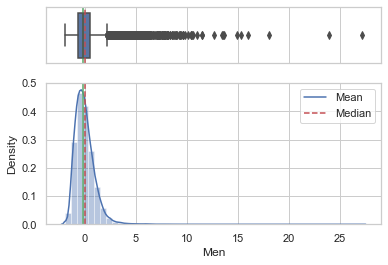

Women
Number of outliers =  31360


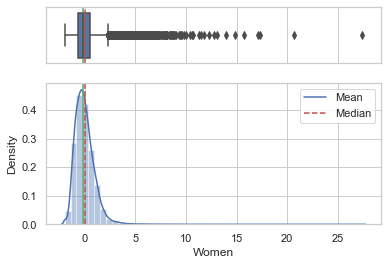

Hispanic
Number of outliers =  60625


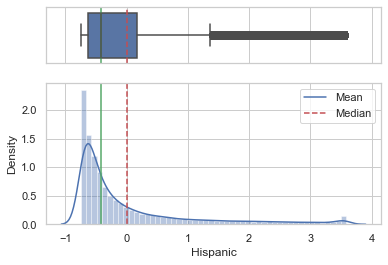

White
Number of outliers =  15201


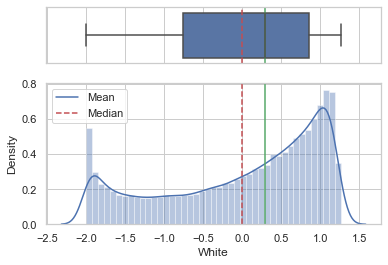

Black
Number of outliers =  71068


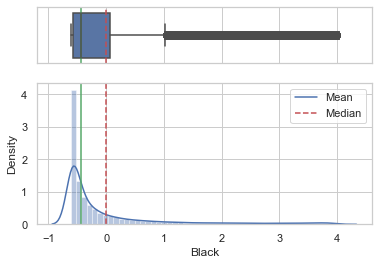

Native
Number of outliers =  73305


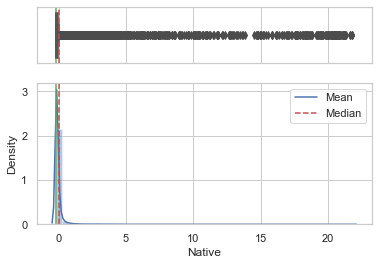

Asian
Number of outliers =  72966


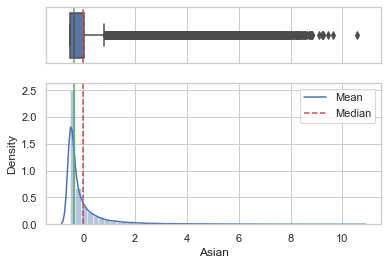

Pacific
Number of outliers =  73305


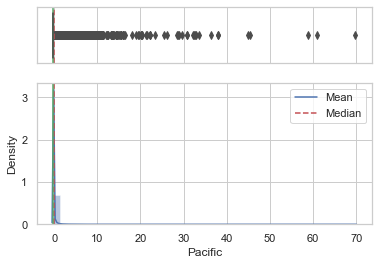

VotingAgeCitizen
Number of outliers =  30018


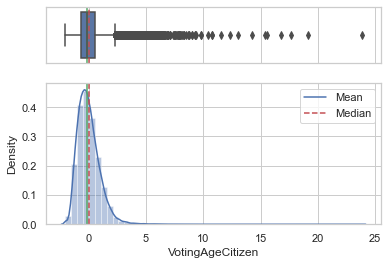

Income
Number of outliers =  34433


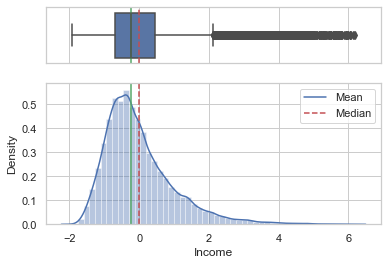

Poverty
Number of outliers =  32266


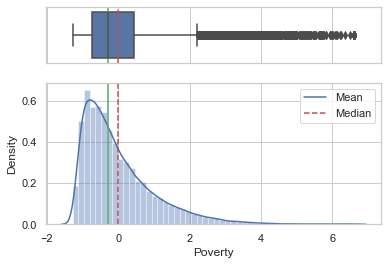

ChildPoverty
Number of outliers =  24519


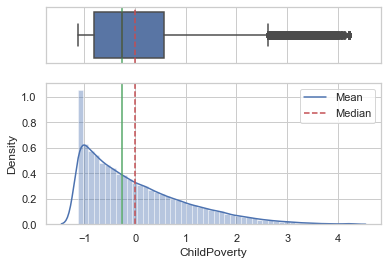

Professional
Number of outliers =  24546


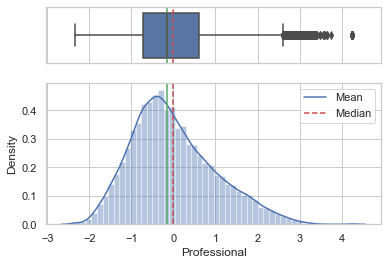

Service
Number of outliers =  28790


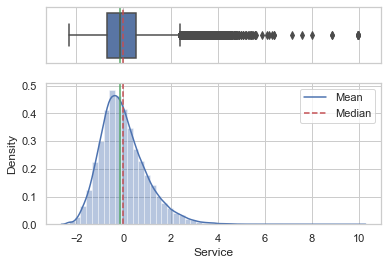

Office
Number of outliers =  27536


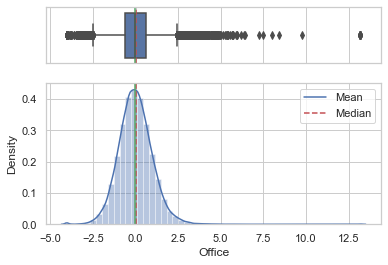

Construction
Number of outliers =  28452


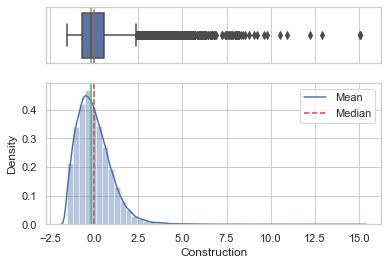

Production
Number of outliers =  24510


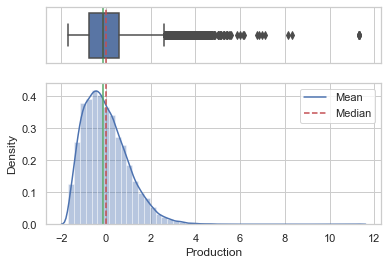

Drive
Number of outliers =  48847


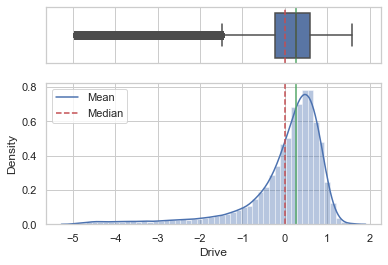

Carpool
Number of outliers =  30964


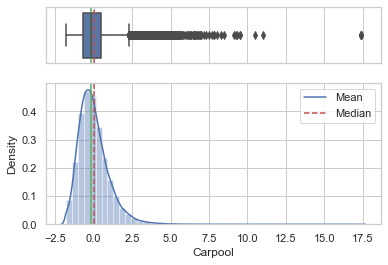

Transit
Number of outliers =  73303


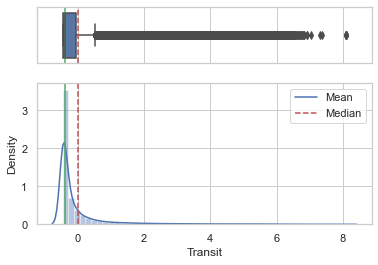

Walk
Number of outliers =  73135


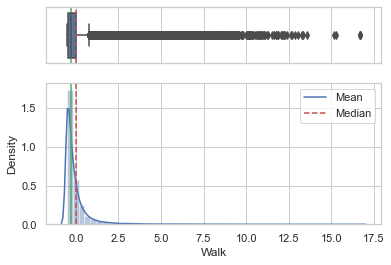

OtherTransp
Number of outliers =  57723


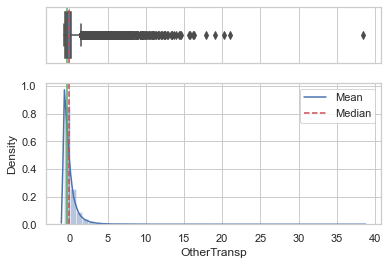

WorkAtHome
Number of outliers =  37515


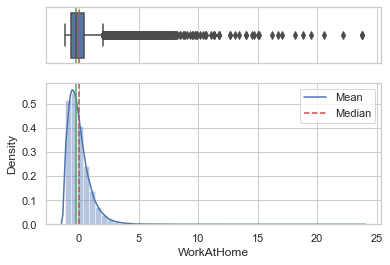

MeanCommute
Number of outliers =  25945


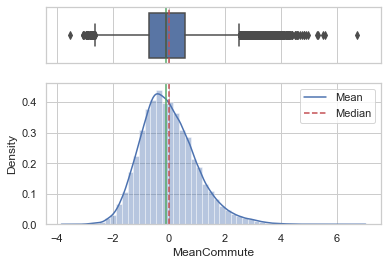

Employed
Number of outliers =  30330


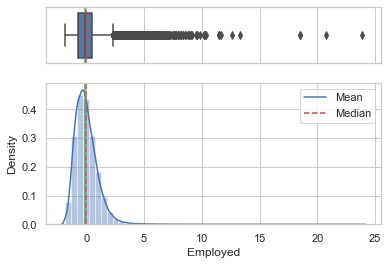

PrivateWork
Number of outliers =  26929


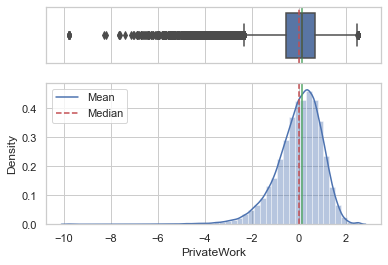

PublicWork
Number of outliers =  33574


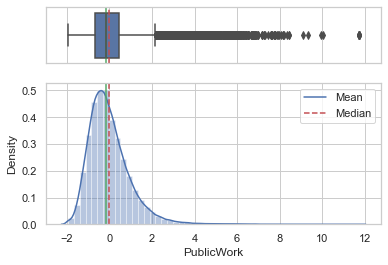

SelfEmployed
Number of outliers =  33275


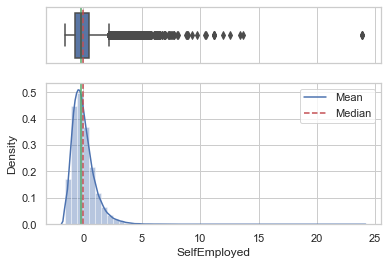

FamilyWork
Number of outliers =  73305


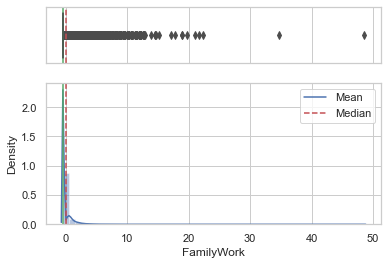

Unemployment
Number of outliers =  41984


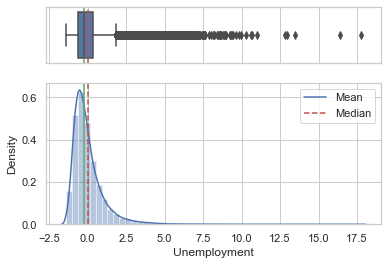

State_Code
Number of outliers =  10624


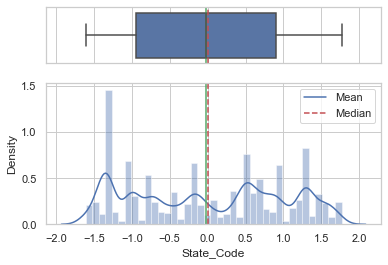

County_Code
Number of outliers =  14865


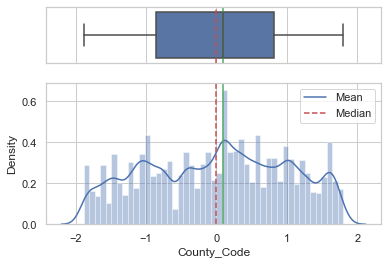

In [43]:
# Histograms of various Input variables alongside Box Plots and visualization of Mean and Median values 

for col in normdf.columns:
    
    print(col)
    Q1 = normdf[col].quantile(0.25)
    Q3 = normdf[col].quantile(0.75)
    IQR = Q3-Q1

    print('Number of outliers = ',len(normdf[((normdf < (Q1 - 1.5 * IQR)) |(normdf > (Q3 + 1.5 * IQR))).any(axis=1)]))

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.4, 1)})

    mean = normdf[col].mean()
    median = normdf[col].median()

    sns.boxplot(normdf[col], ax = ax_box)
    ax_box.axvline(mean, color = 'r', linestyle='--')
    ax_box.axvline(median, color = 'g', linestyle='-')

    sns.distplot(normdf[col])
    ax_hist.axvline(mean, color = 'r', linestyle='--')
    ax_hist.axvline(median, color = 'g', linestyle='-')

    plt.legend({'Mean':mean,'Median':median})

    ax_box.set(xlabel = '')
    plt.show()
    print('===================================================')

In [44]:
#Observations. Based on the above plots, 
#there are many outlier values in almost all features. 
#The data distribution is not normally distributed for 
#most of the features.

#Performing IQR outlier analysis across all columns



In [45]:
#Find the outliers records which fall with +/- 5% boundaries 

Q1 = normdf.quantile(0.05)
Q3 = normdf.quantile(0.95)
IQR = Q3 - Q1
outliers=len(normdf[((normdf < (Q1 - 1.5 * IQR)) |(normdf > (Q3 + 1.5 * IQR))).any(axis=1)])
print("Number of outliers for entire dataset = ", outliers)

Number of outliers for entire dataset =  5650


In [46]:
print("The percentage of outliers in the dataset as per IQR method is: ", (outliers/len(normdf))*100, "%")

The percentage of outliers in the dataset as per IQR method is:  7.7075233612986835 %


In [47]:
# Hence we won't be going for outlier removal as it might 
#affect the nature of the dataset, and hence could affect the reliability
#of the model, despite the fact we using a regression problem

## Feature Engineering

In [48]:
# Combining the data for Asia and Pacific races as Pacific race has very sparse data and can be merged with another race data
normdf['APAC'] = normdf['Asian'] + normdf['Pacific']

In [49]:
normdf[['Poverty','ChildPoverty']]
normdf.drop(['Asian','Pacific'], axis=1)

,Men,Women,Hispanic,White,Black,Native,VotingAgeCitizen,Income,Poverty,ChildPoverty,...,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,State_Code,County_Code,APAC
0,-1.156739,-1.151494,-0.644261,0.815785,-0.374477,-0.161180,-1.135492,0.220841,-0.426933,-0.019086,...,-0.218485,-1.054220,-0.651490,0.960160,-0.425061,-0.374886,-0.506302,-1.610475,-1.715541,-0.538016
1,-0.914395,-1.099320,-0.700602,-0.643366,1.907821,-0.161180,-0.974252,-0.648837,0.494983,0.785392,...,-0.541316,-1.079963,-0.442294,0.114163,0.719297,-0.374886,-0.735853,-1.610475,-1.715541,-0.560239
2,-0.583432,-0.350316,-0.401559,0.002969,0.611586,-0.029434,-0.429325,-0.467980,-0.111748,-0.002997,...,-0.414991,-0.520722,-0.762241,0.946515,-0.348771,1.158263,-0.487173,-1.610475,-1.715541,-0.204938
3,-0.160234,0.015785,-0.332216,0.619926,-0.286519,-0.051391,0.082037,-0.170135,-1.088821,-1.043455,...,-0.021980,-0.194942,-0.454599,0.755483,-0.425061,-0.374886,-0.219363,-1.610475,-1.715541,-0.649130
4,2.600501,2.354765,-0.709270,0.528525,0.144016,-0.161180,2.696107,0.231229,-0.308738,-0.174619,...,-0.709750,2.413071,-0.996049,1.355868,-0.425061,-0.374886,-0.946275,-1.610475,-1.715541,-0.326901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73300,0.774781,0.643640,3.572670,-1.991530,-0.615207,-0.161180,0.787547,-1.329302,1.834520,2.179820,...,0.118381,-0.437280,-2.497342,2.679445,0.210693,-0.374886,2.592642,0.971486,1.771675,-0.671352
73301,-1.102483,-0.765054,3.546667,-1.971944,-0.615207,-0.161180,-0.932132,-1.195503,1.527214,1.005283,...,-0.106197,-1.245072,-2.595788,2.897766,0.007252,-0.374886,3.644752,0.971486,1.771675,-0.671352
73302,-1.064504,-0.911848,3.564002,-1.994795,-0.615207,-0.161180,-0.997944,-1.404574,2.890389,3.005751,...,-0.358847,-1.339166,-2.706539,2.774960,0.464995,-0.374886,3.013486,0.971486,1.771675,-0.649130
73303,-0.193692,0.148430,3.585672,-2.001323,-0.615207,-0.161180,0.140610,-1.389402,2.677640,1.976019,...,-0.274630,-0.893549,-1.451359,2.215511,-1.086246,-0.374886,4.256889,0.971486,1.771675,-0.671352


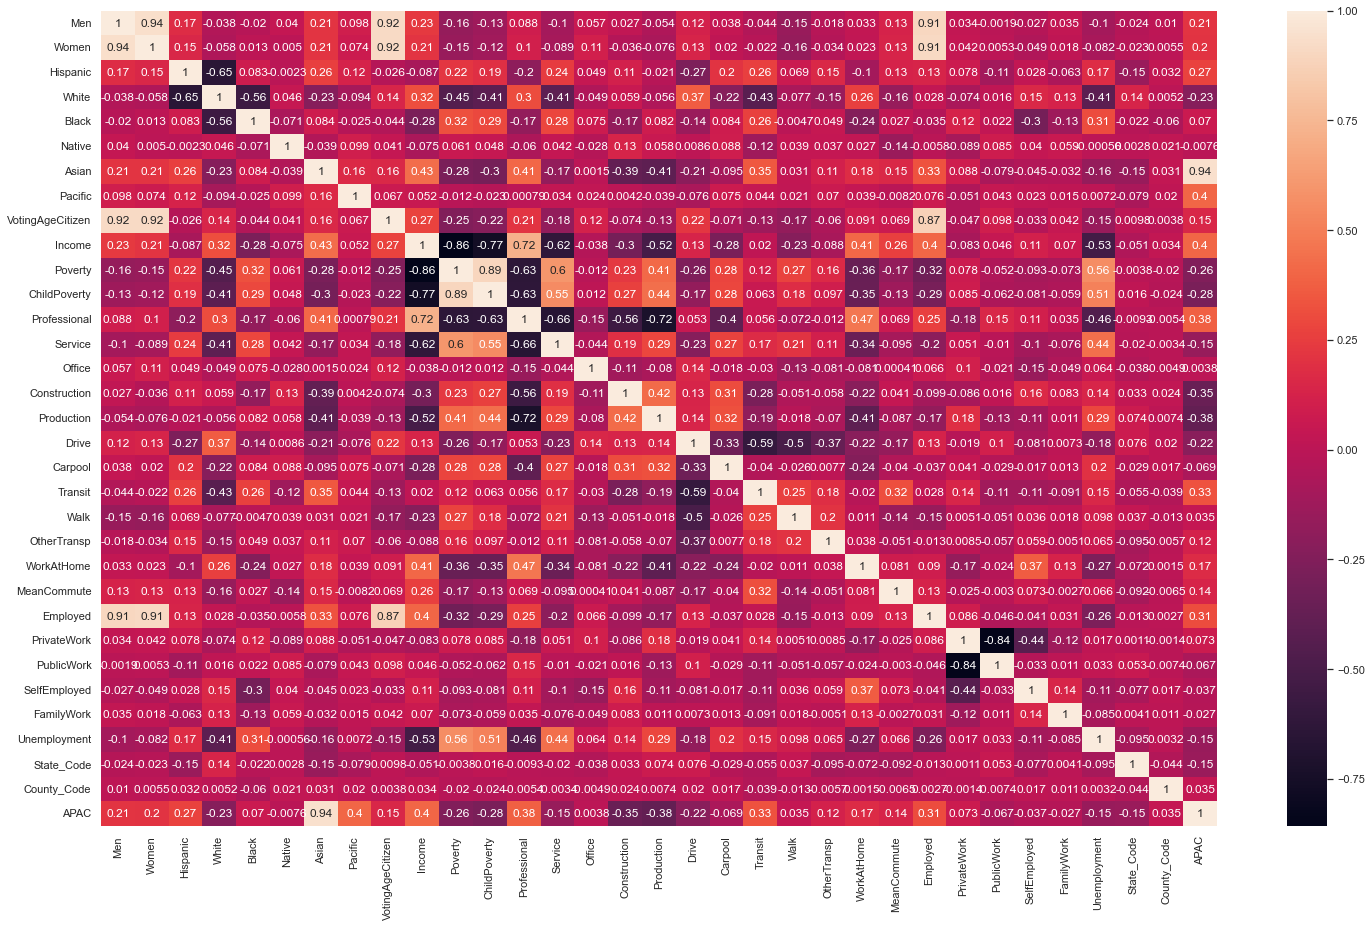

In [50]:
plt.figure(figsize=(25, 15))
corr = normdf.corr('spearman')
sns.heatmap(corr, annot=True)

plt.show()

In [151]:


X = normdf.loc[ : , normdf.columns != 'Income']
Y = normdf['Income']    



In [152]:
# Fit the data in the SelectKBest method with Mutual information for a continuous target.
# Based on the results of hyper-parameter tuning the best k value is 15

fs = SelectKBest(score_func = mutual_info_regression, k = 15) 
features = fs.fit(X,Y)

#Get the feature names
feature_name =  fs.get_support(1)
X_new = X[X.columns[feature_name]] 
kbest_feature = X_new.columns

print("Best 15 features using K-best algorithm - ",kbest_feature)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Divyansh Keshari\AppData\Local\Temp\ipykernel_57992\2194729297.py", line 5, in <cell line: 5>
    features = fs.fit(X,Y)
  File "C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py", line 408, in fit
    score_func_ret = self.score_func(X, y)
  File "C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\sklearn\feature_selection\_mutual_info.py", line 384, in mutual_info_regression
    return _estimate_mi(X, y, discrete_features, False, n_neighbors, copy, random_state)
  File "C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\sklearn\feature_selection\_mutual_info.py", line 300, in _estimate_mi
    mi = [
  File "C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\sklearn\feature_selection\_mutual_info.py"

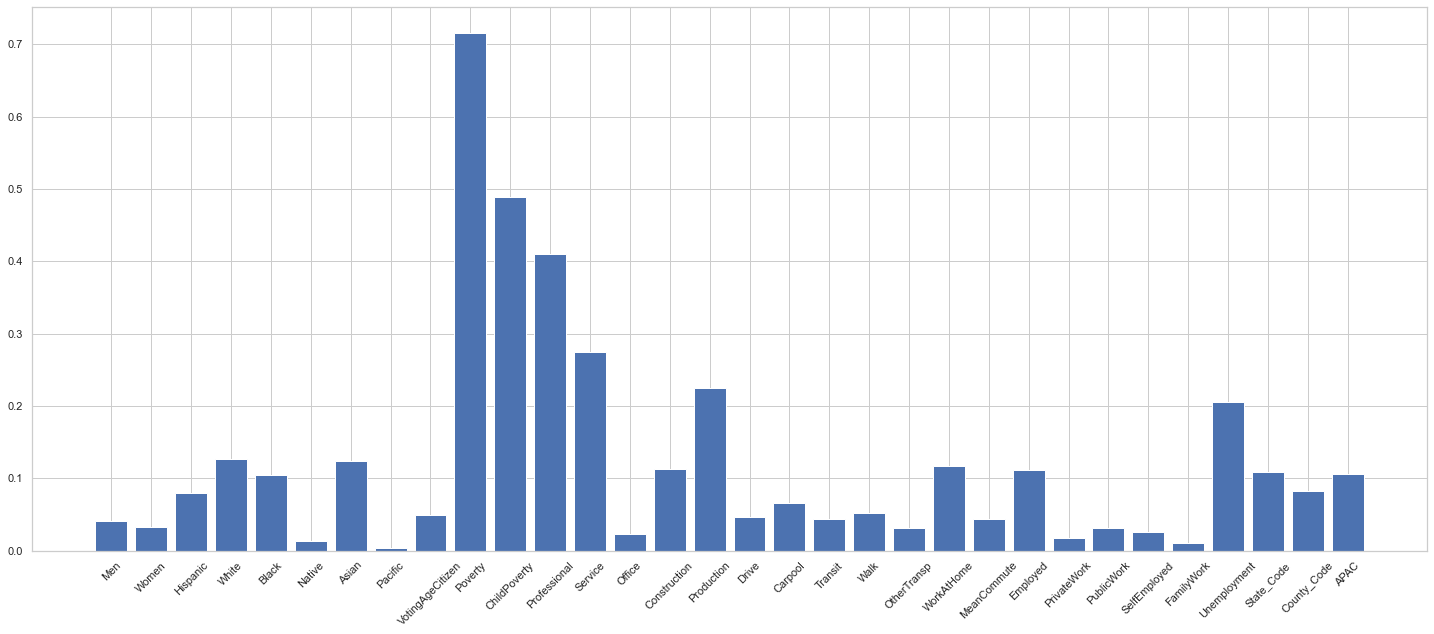

In [53]:


# plot the scores
pyplot.figure(figsize=(25, 10))
pyplot.bar([col for col in X.columns], fs.scores_)
pyplot.xticks(rotation=45)
pyplot.show()



In [54]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
scoresSFS = []

#iterate SFS transformation for every combination of columns to plot the scores for every feature combination
for i in range(0, len(X.columns)):
    # call SFS Forward method - on Linear regression

    sfs = SequentialFeatureSelector(estimator=LinearRegression(), k_features=i+1, scoring='r2', verbose=2, forward=True, n_jobs=-1)
    
    sfs.fit(X, Y)

    scoresSFS.append(sfs.k_score_)

# Plot scores 

#for Sequential Forward Selection(SFS)
plt.figure(figsize=(25, 10))
plt.plot([i for i in range(0, len(X.columns))], scoresSFS)
plt.title('SFS Scores')
plt.xlabel('Number of Attributes')
plt.ylabel('Score')
pyplot.xticks(rotation=45)
plt.show()



In [ ]:
## We notice from the graph how after 15 features, the SFS score gets constant. 
## Hence we will choose 15 best features

In [56]:
sfs = SequentialFeatureSelector(LinearRegression(),
            k_features=15,
            forward=True,
            floating=False,
            scoring = 'r2',
            cv = 0)
    
sfs.fit(X, Y)
print("Best 15 features using forward selection algorithm - ", sfs.k_feature_names_)

Best 15 features using forward selection algorithm -  ('Men', 'Black', 'Asian', 'VotingAgeCitizen', 'Poverty', 'Professional', 'Office', 'Drive', 'Carpool', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'Unemployment', 'County_Code')


In [58]:
# Sequential Backward Selection(SBS)
sbs = SequentialFeatureSelector(LinearRegression(),
          k_features=15,
          forward=False,
          floating=False,
          scoring = 'r2',
          cv = 0)

sbs.fit(X, Y)

print("Best 15 features using backward selection algorithm - ", sbs.k_feature_names_)



Best 15 features using backward selection algorithm -  ('Men', 'Hispanic', 'White', 'Black', 'VotingAgeCitizen', 'Poverty', 'Professional', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'MeanCommute', 'PublicWork', 'SelfEmployed')


In [59]:
Sfs1=['Men', 'Black', 'Asian', 'VotingAgeCitizen', 'Poverty', 'Professional', 'Office', 'Drive', 'Carpool', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'Unemployment', 'County_Code']

In [60]:
sbs1=['Men', 'Hispanic', 'White', 'Black', 'VotingAgeCitizen', 'Poverty', 'Professional', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'MeanCommute', 'PublicWork', 'SelfEmployed']

In [61]:
common_feature=list(set(Sfs1)&set(sbs1))
common_feature

['Carpool',
 'Poverty',
 'Professional',
 'Men',
 'Drive',
 'MeanCommute',
 'VotingAgeCitizen',
 'Black']

In [62]:
all_feature=list(set(Sfs1) | set(sbs1))
all_feature

['Walk',
 'Carpool',
 'Transit',
 'Asian',
 'Men',
 'White',
 'SelfEmployed',
 'Hispanic',
 'MeanCommute',
 'VotingAgeCitizen',
 'County_Code',
 'PrivateWork',
 'Office',
 'Black',
 'PublicWork',
 'Poverty',
 'Professional',
 'WorkAtHome',
 'Drive',
 'Unemployment',
 'OtherTransp',
 'Employed']

In [63]:
##MODELING

In [64]:
df1 = normdf.loc[:, normdf.columns.isin(Sfs1)]

In [65]:
target_df=normdf['Income']

In [102]:
X_train, X_test, y_train, y_test=train_test_split(df1,target_df,test_size = 0.2)

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

In [155]:

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Initialize LassoCV for feature selection
lasso = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)

# Fit LassoCV to the training data
lasso.fit(X_train_std, y_train)

# Get the best alpha (penalty parameter)
best_alpha = lasso.alpha_

# Get the selected features
selected_features = np.where(lasso.coef_ != 0)[0]

# Print selected feature indices and names
print("Selected Features (Indices):", selected_features)
print("Selected Features (Names):", normdf([selected_features]))


Selected Features (Indices): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


TypeError: 'DataFrame' object is not callable

In [68]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [69]:
y_pred = lr.predict(X_test)

In [70]:
 model_score = lr.score(df1, target_df) 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(model_score, "\t",mse, "\t",r2,"\t",rmse,"\t",mae,"\t",evs)

0.7224083281511873 	 0.2857566982582811 	 0.7203524004119507 	 0.5345621556547762 	 0.37670361106876543 	 0.7203542127224365


In [71]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [72]:
y_pred = rf_model.predict(X_test)
initial_mse = mean_squared_error(y_test, y_pred)
print(f"Initial Mean Squared Error: {initial_mse:.2f}")



Initial Mean Squared Error: 0.17


In [73]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [None, 10,20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [3,5 ,10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [3, 5, 10],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [10, 20, 50]},
             verbose=2)

In [77]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred_best)

print("Best Parameters:", best_params)
print(f"Best Mean Squared Error: {best_mse:.2f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 50}
Best Mean Squared Error: 0.17


In [79]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
    
print("Model score is          = %.4f" % model_score)
print("R2 score                = %.4f" % r2)
print("Explained Variance score= %.4f" % evs)
print("Mean absolute error     = %.4f" % mae)
print("Mean squared error      = %.4f" % mse)
print("Root Mean squared error = %.4f" % rmse)

Model score is          = 0.7224
R2 score                = 0.8336
Explained Variance score= 0.8337
Mean absolute error     = 0.2821
Mean squared error      = 0.1701
Root Mean squared error = 0.4124


In [84]:
Regmodel = RidgeCV()


# Train the model, using training data set
Regmodel.fit(X_train, y_train)

# Use trained model to predict on test dataset
y_pred = Regmodel.predict(X_test)

#Print the Model evaluation results
print('Variance score or R2 score = %.4f' % r2_score(y_test, y_pred))
print("Mean squared error         = %.4f" % mean_squared_error(y_test, y_pred))
print("Root Mean squared error    = %.4f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print('alpha: %f' % Regmodel.alpha_)
r2_43 = r2_score(y_test, y_pred)
rmse_43 = math.sqrt(mean_squared_error(y_test, y_pred))
mae_43 = mean_absolute_error(y_test, y_pred)

Variance score or R2 score = 0.7204
Mean squared error         = 0.2858
Root Mean squared error    = 0.5346
alpha: 10.000000


In [83]:
# Polynomial transformation with degree 3
polynomial = PolynomialFeatures(degree=3)
feat_poly = polynomial.fit_transform(normdf)


pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

# Use trained model to predict on test dataset
y_pred = pol_reg.predict(X_test)

#Print the Model evaluation results
print('Variance score or R2 score = %.4f' % r2_score(y_test, y_pred))
print("Mean squared error         = %.4f" % mean_squared_error(y_test, y_pred))
print("Root Mean squared error    = %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))

Variance score or R2 score = 0.7204
Mean squared error         = 0.2858
Root Mean squared error    = 0.53


In [85]:
from xgboost import XGBRegressor

In [86]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [87]:
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.16


In [100]:
param_grid = {
    'n_estimators': [100, 200, 300,400],
    'max_depth': [4,5, 6],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



Fitting 3 folds for each of 36 candidates, totalling 108 fits


exception calling callback for <Future at 0x1e2c9b82280 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
  File "C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    **backend_params
  File "C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
    # registers the task outcome (TASK_ERROR or TASK_DONE), and schedules
  File "C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    with self.parallel._lock:
  File "C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
  File "C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    """Shutdown the process or thread pool"""
  File "C:\Us

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Divyansh Keshari\AppData\Local\Temp\ipykernel_57992\828862825.py", line 8, in <cell line: 8>
    grid_search.fit(X_train, y_train)
  File "C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 891, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 1392, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 838, in evaluate_candidates
    out = parallel(
  File "C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\joblib\parallel.py", line 1056, in __call__
  File "C:\Users\Divyansh Keshari\anaconda3\li

In [101]:
y_pred_best = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred_best)
best_mae=mean_absolute_error(y_test, y_pred_best)
print("Best Parameters:", best_params)
print(f"Best Mean Squared Error: {best_mse:.2f}")
print(f"Best Mean abs Error: { best_mae:.2f}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 400}
Best Mean Squared Error: 0.14
Best Mean abs Error: 0.26


In [94]:
xgb_model1 = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=6,random_state=42)
xgb_model1.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [95]:
y_pred = xgb_model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.14


In [96]:
r2xg = r2_score(y_test, y_pred)
maexg = mean_absolute_error(y_test, y_pred)
    
print("R2 score                = %.4f" % r2xg)
print("Mean absolute error     = %.4f" % maexg)


R2 score                = 0.8584
Mean absolute error     = 0.2604


In [ ]:
from lazypredict.Supervised import LazyRegressor

In [98]:
regressor = LazyRegressor(predictions=True)
models = regressor.fit(X_train, X_test, y_train, y_test)

print(models)

 98%|█████████▊| 41/42 [47:06<02:03, 123.05s/it]  

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3824
[LightGBM] [Info] Number of data points in the train set: 58644, number of used features: 15
[LightGBM] [Info] Start training from score -0.001066


100%|██████████| 42/42 [47:07<00:00, 67.32s/it] 

(                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
MLPRegressor                                 0.85       0.85  0.39       24.10
SVR                                          0.85       0.85  0.39      986.43
NuSVR                                        0.85       0.85  0.39     1619.64
XGBRegressor                                 0.85       0.85  0.39        3.07
LGBMRegressor                                0.85       0.85  0.39        1.02
HistGradientBoostingRegressor                0.85       0.85  0.40        1.13
ExtraTreesRegressor                          0.83       0.83  0.41       23.00
RandomForestRegressor                        0.83       0.83  0.41      115.52
GradientBoostingRegressor                    0.83       0.83  0.42       17.29
BaggingRegressor                             0.82       0.82  0.43        6.24
KNeighborsRegressor                          0.79  

In [ ]:
##for backward selection features

In [ ]:
X_train, X_test, y_train, y_test= train_test_split((normdf.loc[:, normdf.columns.isin(sbs1)]),target_df,test_size = 0.2)

In [ ]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
model_score = lr.score((normdf.loc[:, normdf.columns.isin(sbs1)]), target_df) 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(model_score, "\t",mse, "\t",r2,"\t",rmse,"\t",mae,"\t",evs)

In [ ]:
## for union of features

In [ ]:
X_train, X_test, y_train, y_test= train_test_split((normdf.loc[:, normdf.columns.isin(all_feature)]),target_df,test_size = 0.2)

In [ ]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
model_score = lr.score((normdf.loc[:, normdf.columns.isin(all_feature)]), target_df) 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(model_score, "\t", mse, "\t",r2,"\t",rmse,"\t",mae,"\t",evs)